# Keras - MLPs on MNIST :

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [8]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# X => (X - Xmin)/(Xmax-Xmin) = X/255
#to normalize 

X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 2 Hidden Layer : 

###  MLP + RELU activation + ADAM

### DROPOUT = 0.2 Epoch = 10

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 10


model_ = Sequential()
model_.add(Dense(300, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(150, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_55 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_55 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_56 (Batc (None, 150)               600       
_________________________________________________________________
dropout_56 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                1510      
Total para

In [48]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.05873604698409909
Test accuracy: 0.9828


<IPython.core.display.Javascript object>


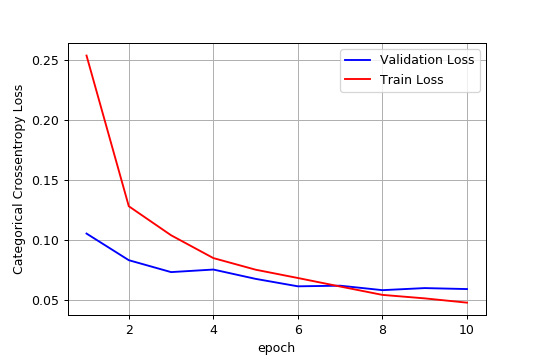

In [49]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


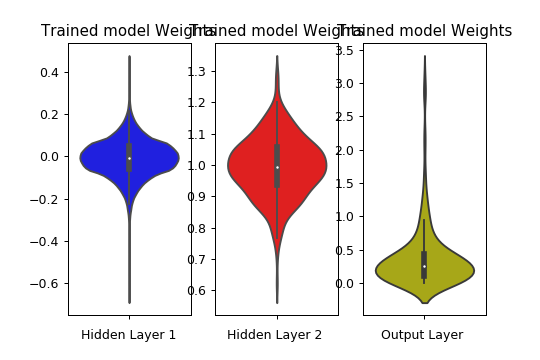

In [50]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout = 0.3  Epoch = 13

In [41]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 13


model_ = Sequential()
model_.add(Dense(300, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(150, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_19 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_20 (Batc (None, 150)               600       
_________________________________________________________________
dropout_20 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1510      
Total para

In [42]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.053555122423556166
Test accuracy: 0.9829


<IPython.core.display.Javascript object>


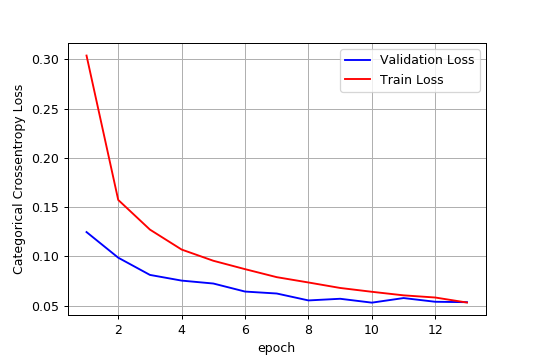

In [43]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


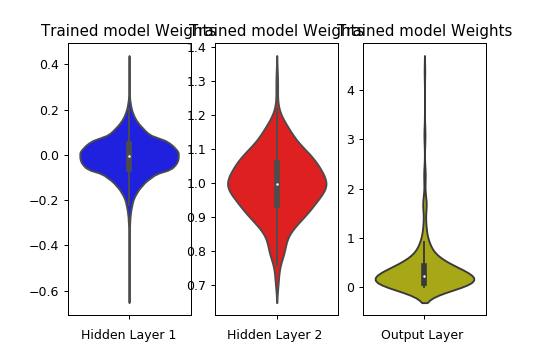

In [27]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout = 0.5  Epoch = 30

In [34]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 30


model_ = Sequential()
model_.add(Dense(300, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(150, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_15 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_16 (Batc (None, 150)               600       
_________________________________________________________________
dropout_16 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1510      
Total para

In [35]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.055460067555046406
Test accuracy: 0.9844


<IPython.core.display.Javascript object>


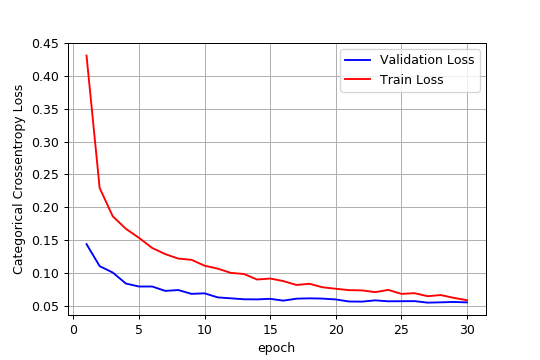

In [36]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


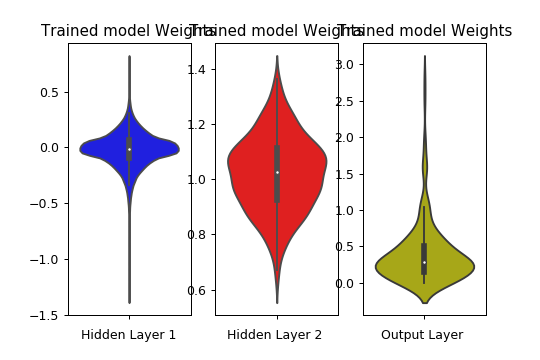

In [37]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Without BatchNormalizing :

### Dropout = 0.2 Epoch = 4

In [61]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 4


model_ = Sequential()
model_.add(Dense(300, activation='relu', input_shape=(input_dim,)))

model_.add(Dropout(0.2))

model_.add(Dense(150, activation='relu') )

model_.add(Dropout(0.2))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_35 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_36 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1510      
Total params: 282,160
Trainable params: 282,160
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 17s 276us/step - loss: 0.2711

In [62]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.07081522766933776
Test accuracy: 0.9774


<IPython.core.display.Javascript object>


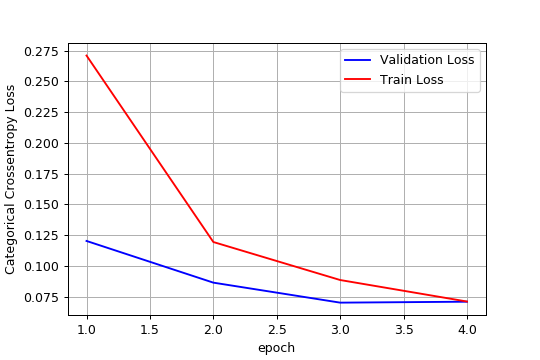

In [63]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


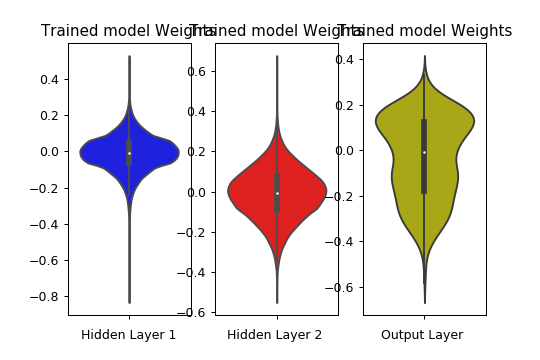

In [47]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Hidden Layer : 

###  MLP + RELU activation + ADAM

### Dropout = 0.2 Epoch = 10

In [51]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 10


model_ = Sequential()
model_.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(264, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(132, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_57 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 264)               135432    
_________________________________________________________________
batch_normalization_58 (Batc (None, 264)               1056      
_________________________________________________________________
dropout_58 (Dropout)         (None, 264)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 132)               34980     
__________

In [52]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.06182091858504573
Test accuracy: 0.9808


<IPython.core.display.Javascript object>


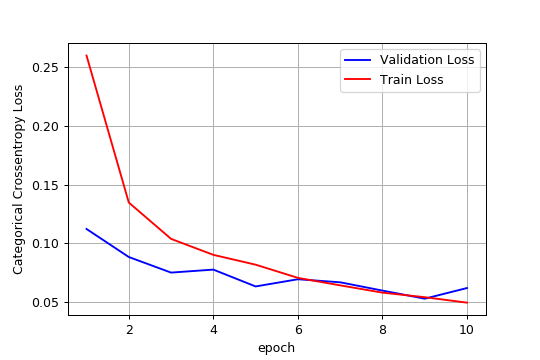

In [53]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


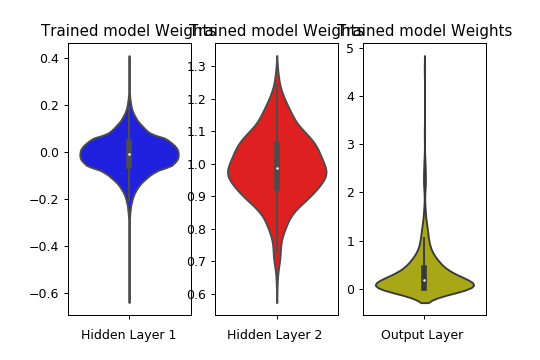

In [54]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout = 0.3  Epoch = 13

In [49]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 13


model_ = Sequential()
model_.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(264, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(132, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_24 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 264)               135432    
_________________________________________________________________
batch_normalization_25 (Batc (None, 264)               1056      
_________________________________________________________________
dropout_27 (Dropout)         (None, 264)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 132)               34980     
__________

In [50]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0542973043271224
Test accuracy: 0.9846


<IPython.core.display.Javascript object>


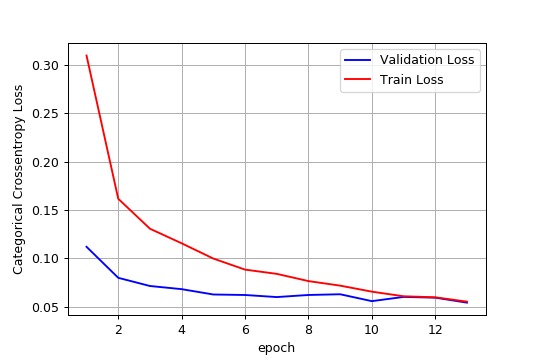

In [51]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


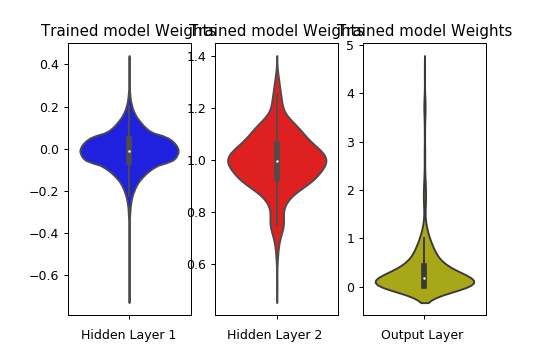

In [52]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout = 0.5  Epoch = 30

In [53]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 30


model_ = Sequential()
model_.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(264, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(132, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 264)               135432    
_________________________________________________________________
batch_normalization_28 (Batc (None, 264)               1056      
_________________________________________________________________
dropout_30 (Dropout)         (None, 264)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 132)               34980     
__________

In [54]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.05303520419441629
Test accuracy: 0.9853


<IPython.core.display.Javascript object>


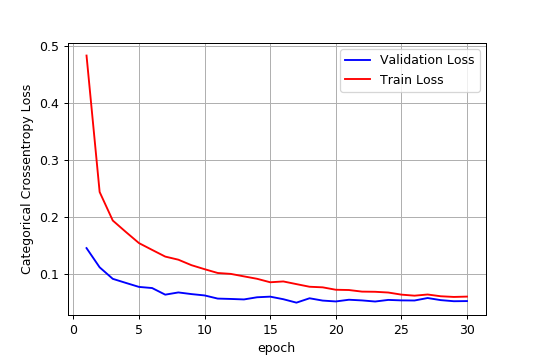

In [55]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


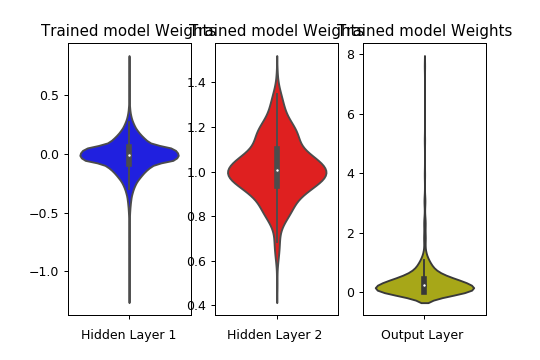

In [56]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Without BatchNormalization :

### Dropout = 0.2 Epoch = 4

In [67]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 60 
nb_epoch = 4


model_ = Sequential()
model_.add(Dense(512, activation='relu', input_shape=(input_dim,)))

model_.add(Dropout(0.2))

model_.add(Dense(264, activation='relu') )

model_.add(Dropout(0.2))

model_.add(Dense(132, activation='relu') )

model_.add(Dropout(0.2))

model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 264)               135432    
_________________________________________________________________
dropout_41 (Dropout)         (None, 264)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 132)               34980     
_________________________________________________________________
dropout_42 (Dropout)         (None, 132)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1330      
Total para

In [68]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07702424267993774
Test accuracy: 0.9766


<IPython.core.display.Javascript object>


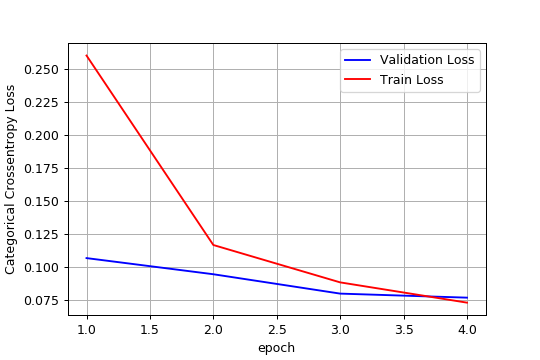

In [69]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


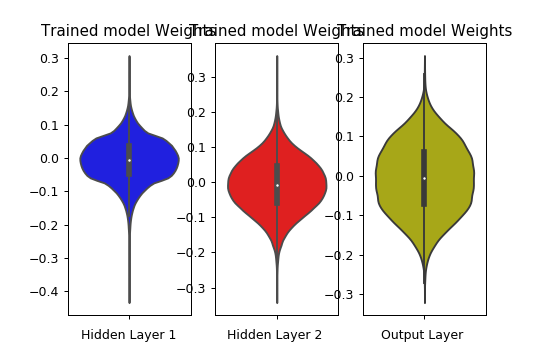

In [70]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 Hidden Layer : 

###  MLP + RELU activation + ADAM

### Dropout = 0.2 Epoch = 10

In [63]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 50 
nb_epoch = 10


model_ = Sequential()
model_.add(Dense(400, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(350, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(150, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))

model_.add(Dense(100, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))


model_.add(Dense(75, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 400)               314000    
_________________________________________________________________
batch_normalization_101 (Bat (None, 400)               1600      
_________________________________________________________________
dropout_100 (Dropout)        (None, 400)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 350)               140350    
_________________________________________________________________
batch_normalization_102 (Bat (None, 350)               1400      
_________________________________________________________________
dropout_101 (Dropout)        (None, 350)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 150)               52650     
__________

In [64]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06391797266732901
Test accuracy: 0.981


<IPython.core.display.Javascript object>


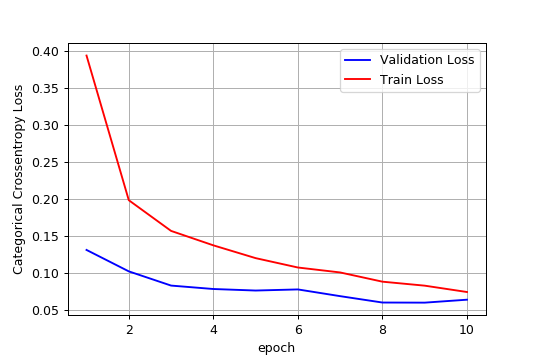

In [65]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


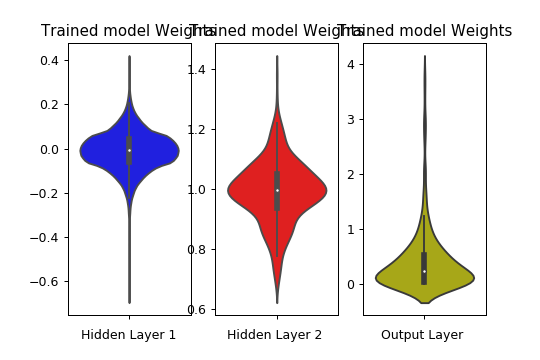

In [66]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout = 0.3  Epoch = 20

In [75]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 50 
nb_epoch = 20


model_ = Sequential()
model_.add(Dense(400, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(350, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(150, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(100, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))


model_.add(Dense(75, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.3))



model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_35 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_48 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 350)               140350    
_________________________________________________________________
batch_normalization_36 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_49 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 150)               52650     
__________

In [76]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.056552301352098586
Test accuracy: 0.9856


<IPython.core.display.Javascript object>


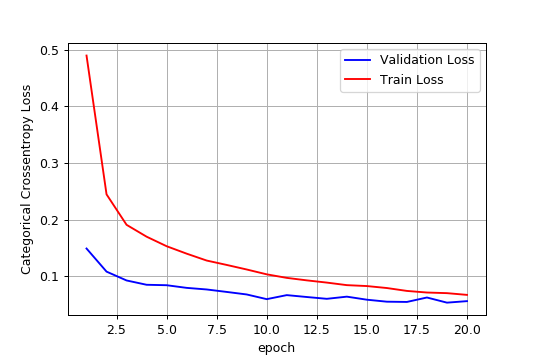

In [77]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


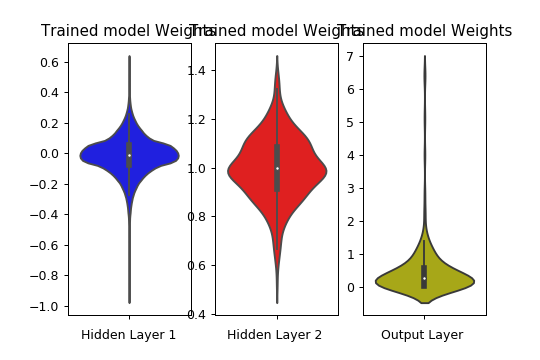

In [78]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout = 0.5  Epoch = 50

In [82]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 50 
nb_epoch = 50


model_ = Sequential()
model_.add(Dense(400, activation='relu', input_shape=(input_dim,)))
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(350, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(150, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))

model_.add(Dense(100, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))


model_.add(Dense(75, activation='relu') )
model_.add(BatchNormalization())
model_.add(Dropout(0.5))



model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_45 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_58 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 350)               140350    
_________________________________________________________________
batch_normalization_46 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_59 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 150)               52650     
__________

Epoch 42/50
60000/60000 [==============================] - 22s 362us/step - loss: 0.0941 - acc: 0.9759 - val_loss: 0.0632 - val_acc: 0.9850
Epoch 43/50
60000/60000 [==============================] - 21s 351us/step - loss: 0.0947 - acc: 0.9754 - val_loss: 0.0625 - val_acc: 0.9848
Epoch 44/50
60000/60000 [==============================] - 22s 360us/step - loss: 0.0950 - acc: 0.9754 - val_loss: 0.0657 - val_acc: 0.9842
Epoch 45/50
60000/60000 [==============================] - 21s 355us/step - loss: 0.0938 - acc: 0.9763 - val_loss: 0.0612 - val_acc: 0.9856
Epoch 46/50
60000/60000 [==============================] - 21s 354us/step - loss: 0.0873 - acc: 0.9772 - val_loss: 0.0627 - val_acc: 0.9852
Epoch 47/50
60000/60000 [==============================] - 21s 358us/step - loss: 0.0872 - acc: 0.9777 - val_loss: 0.0636 - val_acc: 0.9859
Epoch 48/50
60000/60000 [==============================] - 21s 353us/step - loss: 0.0905 - acc: 0.9768 - val_loss: 0.0652 - val_acc: 0.9856
Epoch 49/50
60000/60

In [83]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.059813814337644725
Test accuracy: 0.9859


<IPython.core.display.Javascript object>


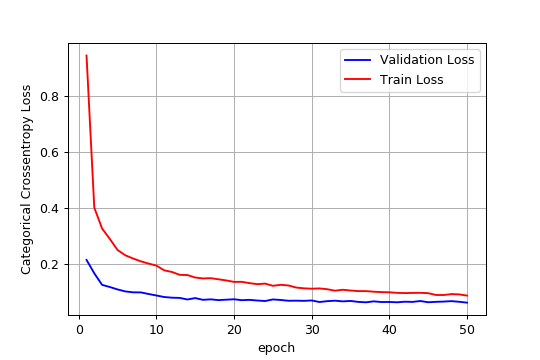

In [84]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Without BatchNormalization

### Dropout = 0.2 Epoch = 4

In [129]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 50 
nb_epoch = 4


model_ = Sequential()
model_.add(Dense(400, activation='relu', input_shape=(input_dim,)))

model_.add(Dropout(0.2))

model_.add(Dense(350, activation='relu') )

model_.add(Dropout(0.2))

model_.add(Dense(150, activation='relu') )

model_.add(Dropout(0.2))

model_.add(Dense(100, activation='relu') )

model_.add(Dropout(0.2))


model_.add(Dense(75, activation='relu') )

model_.add(Dropout(0.2))



model_.add(Dense(output_dim, activation='softmax'))

model_.summary()

model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 400)               314000    
_________________________________________________________________
dropout_83 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 350)               140350    
_________________________________________________________________
dropout_84 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 150)               52650     
_________________________________________________________________
dropout_85 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 100)               15100     
__________

In [130]:
score = model_.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09157433028473752
Test accuracy: 0.9743


<IPython.core.display.Javascript object>


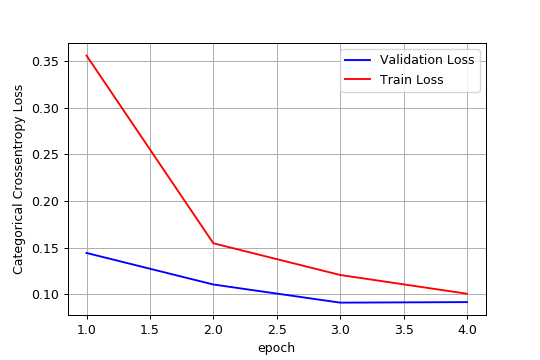

In [131]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


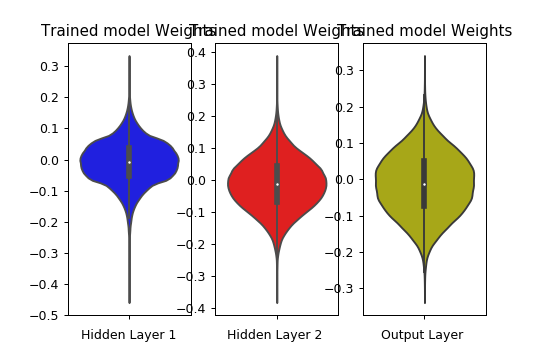

In [132]:
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusions :

In [133]:
from prettytable import PrettyTable
    
x = PrettyTable(["No. of Hidden layers", "Dropout","Epoch","Batch Size","Test Accuracy"])
x.align["No. of Hidden layers"] = "l"
x.add_row(["[1] 2 Hidden Layers (Architecture 300-150)\n\n\n\n     Without BatchNormalization\n","0.2\n0.3\n0.5\n\n0.2","10\n13\n30\n\n4","60\n60\n60\n\n60","98.28\n98.29\n98.44\n\n97.74"])
x.add_row(["[2] 3 Hidden Layers (Architecture 512-264-132)\n\n\n\n     Without BatchNormalization\n","0.2\n0.3\n0.5\n\n0.2","10\n13\n30\n\n4","60\n60\n60\n\n60","98.08\n98.46\n98.53\n\n97.66"])
x.add_row(["[3] 5 Hidden Layers (Architecture 400-350-150-100-75)\n\n\n\n     Without BatchNormalization\n","0.2\n0.3\n0.5\n\n0.2","10\n20\n50\n\n4","50\n50\n50\n\n50","98.1\n98.56\n98.59\n\n97.43"])

print(x.get_string(title="MLP"))

+------------------------------------------------------------------------------------------------------+
|                                                 MLP                                                  |
+-------------------------------------------------------+---------+-------+------------+---------------+
| No. of Hidden layers                                  | Dropout | Epoch | Batch Size | Test Accuracy |
+-------------------------------------------------------+---------+-------+------------+---------------+
| [1] 2 Hidden Layers (Architecture 300-150)            |   0.2   |   10  |     60     |     98.28     |
|                                                       |   0.3   |   13  |     60     |     98.29     |
|                                                       |   0.5   |   30  |     60     |     98.44     |
|                                                       |         |       |            |               |
|      Without BatchNormalization                      

1] As dropout is increased from 0.2 to 0.5 with same batch size and architecture , number of epoch needed starts increasing<br>
2] After reaching the particular epoch the model overfits.<br>
3] When we dont apply BatchNormalization, no. of epoch becomes 4 after which the model starts overfitting.<br>
4] For 5 Hidden Layers with dropout = 0.5 , epoch reached maximum which is 50.<br>
5] All the test Accuracy is in the range of (98 - 98.5) %<br>
6] For models without BatchNormalization we got less test accuracy of approx 97 %<br>
   